## Setup

In [117]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os 
import shutil

pd.options.mode.chained_assignment = None

## Police Data Cleaning

In [118]:
df = pd.read_csv('Mapping Police Violence-Grid view.csv')
mpv = df[['cause_of_death','race','date','officer_charged','allegedly_armed']]
#renaming "allegedly_armed" to "armed"
mpv = mpv.rename(columns={'allegedly_armed': 'armed'})
mpv

,cause_of_death,race,date,officer_charged,armed
0,NaN,Black,3/14/2022,NaN,Allegedly Armed
1,NaN,White,3/12/2022,NaN,Allegedly Armed
2,Gunshot,White,3/12/2022,No Known Charges,Allegedly Armed
3,Gunshot,NaN,3/12/2022,No Known Charges,Allegedly Armed
4,Gunshot,White,3/11/2022,No Known Charges,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,1/1/2013,No Known Charges,Unclear
10071,Gunshot,Black,1/1/2013,No Known Charges,Allegedly Armed
10072,Gunshot,White,1/1/2013,No Known Charges,Allegedly Armed
10073,Gunshot,Hispanic,1/1/2013,No Known Charges,Allegedly Armed


In [119]:
# Converting 'date' column into datatype 'pandas Timestamp'

mpv['date'] = pd.to_datetime(mpv['date'], infer_datetime_format=True)
mpv

,cause_of_death,race,date,officer_charged,armed
0,NaN,Black,2022-03-14,NaN,Allegedly Armed
1,NaN,White,2022-03-12,NaN,Allegedly Armed
2,Gunshot,White,2022-03-12,No Known Charges,Allegedly Armed
3,Gunshot,NaN,2022-03-12,No Known Charges,Allegedly Armed
4,Gunshot,White,2022-03-11,No Known Charges,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,2013-01-01,No Known Charges,Unclear
10071,Gunshot,Black,2013-01-01,No Known Charges,Allegedly Armed
10072,Gunshot,White,2013-01-01,No Known Charges,Allegedly Armed
10073,Gunshot,Hispanic,2013-01-01,No Known Charges,Allegedly Armed


In [120]:
type(mpv['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [121]:
# Removing incidents occuring after 2020-09 as we do not have tweets after that period\n",
cutoff_date = pd.Timestamp(2020, 10, 1)

mpv = mpv[mpv.date < cutoff_date]

# Setting date as index
mpv.set_index('date')

,cause_of_death,race,officer_charged,armed
date,,,,
2020-09-30,Gunshot,White,No Known Charges,Allegedly Armed
2020-09-30,Gunshot,Black,No Known Charges,Unclear
2020-09-29,Gunshot,Unknown race,No Known Charges,Allegedly Armed
2020-09-28,Gunshot,Black,No Known Charges,Allegedly Armed
2020-09-28,Gunshot,Hispanic,No Known Charges,Allegedly Armed
...,...,...,...,...
2013-01-01,Gunshot,Hispanic,No Known Charges,Unclear
2013-01-01,Gunshot,Black,No Known Charges,Allegedly Armed
2013-01-01,Gunshot,White,No Known Charges,Allegedly Armed


In [122]:
print(mpv['race'].unique())
print(mpv['cause_of_death'].unique())
print(mpv['armed'].unique())

['White' 'Black' 'Unknown race' 'Hispanic' 'Asian' 'Native American' nan
 'Pacific Islander']
['Gunshot' 'Gunshot,Taser' 'Taser' 'Vehicle' 'Physical Restraint'
 'Chemical Agent' 'Beaten' 'Other' 'Bean bag' 'Pepper Spray' 'Asphyxiated'
 'Bomb' 'Taser,Physical Restraint' nan 'Gunshot,Vehicle']
['Allegedly Armed' 'Unclear' 'Unarmed/Did Not Have Actual Weapon'
 'Vehicle' nan]


In [123]:
mpv['armed'].value_counts()

Allegedly Armed                       5987
Unarmed/Did Not Have Actual Weapon    1177
Unclear                                741
Vehicle                                567
Name: armed, dtype: int64

In [124]:
mpv['cause_of_death'].value_counts()
#proportion of gunshot vs taser, assign to gunshot then

Gunshot                     7815
Taser                        273
Gunshot,Taser                247
Vehicle                       44
Physical Restraint            34
Beaten                        32
Asphyxiated                    9
Other                          5
Pepper Spray                   5
Bean bag                       2
Taser,Physical Restraint       2
Chemical Agent                 1
Bomb                           1
Gunshot,Vehicle                1
Name: cause_of_death, dtype: int64

In [125]:
print(mpv['officer_charged'].unique())

['No Known Charges' '"Charged, Charges Dropped"' 'Charged with a crime'
 nan '"Charged, Convicted, Sentenced to 22.5 years in prison"'
 '"Charged, Convicted"'
 '"Charged, Convicted, Sentenced to life in prison"'
 '"Charged, Convicted, Sentenced to 10 years in prison"'
 '"Charged, Convicted, Sentenced to 7 years in prison"'
 '"Charged, Acquitted"'
 '"Charged, Plead Guilty to Voluntary Manslaughter"'
 '"Charged, Convicted, Sentenced to 1 year in prison and 4 years probation"'
 '"Charged, Convicted, Sentenced to 25 years in prison"'
 '"Charged, Convicted, Sentenced to 2 years suspension and 3 years probation"'
 '"Charged, Convicted, Sentenced to 5-15 years in prison"'
 '"Charged, Convicted, Sentenced to 4.75 years in prison"'
 '"Charged, Mistrial"'
 '"Charged, Convicted, Sentenced to 15 years in prison"'
 '"Charged, Plead No Contest, Sentenced to 10 years probation"'
 '"Charged, Convicted, Sentenced to 6 years in prison"'
 '"Charged, Convicted, Sentenced to 10 Years of Prison"'
 '"Charged

In [126]:
#cleaning "officer_charged"

mpv['officer_charged'] = mpv['officer_charged'].astype(str)

mpv.loc[mpv['officer_charged'].str.contains('Charged') == True, "officer_charged"] = "Charged"
mpv.loc[mpv['officer_charged'] == 'No Known Charges', 'officer_charged'] = "Not Charged"
mpv.loc[mpv['officer_charged'] == 'nan', 'officer_charged'] = "Unknown"
mpv

,cause_of_death,race,date,officer_charged,armed
1602,Gunshot,White,2020-09-30,Not Charged,Allegedly Armed
1603,Gunshot,Black,2020-09-30,Not Charged,Unclear
1604,Gunshot,Unknown race,2020-09-29,Not Charged,Allegedly Armed
1605,Gunshot,Black,2020-09-28,Not Charged,Allegedly Armed
1606,Gunshot,Hispanic,2020-09-28,Not Charged,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,2013-01-01,Not Charged,Unclear
10071,Gunshot,Black,2013-01-01,Not Charged,Allegedly Armed
10072,Gunshot,White,2013-01-01,Not Charged,Allegedly Armed
10073,Gunshot,Hispanic,2013-01-01,Not Charged,Allegedly Armed


In [127]:
print(mpv['officer_charged'].unique())
type(mpv['officer_charged'].iloc[0])

['Not Charged' 'Charged' 'Unknown']


str

In [128]:
print(mpv['officer_charged'].unique())

['Not Charged' 'Charged' 'Unknown']


In [129]:
mpv.dtypes
#probably nan

cause_of_death             object
race                       object
date               datetime64[ns]
officer_charged            object
armed                      object
dtype: object

## Variables

### Cause of Death

Variable name: cause_of_death

Data type: string

Lists cause of death of police victims. Includes: NaN, gunshot, vehicle, taser, beaten, physical restraint, chemical agent, bean bag, pepper spray, asphyxiated, bomb, or multiple causes.

### Victim's Race

Variable name: race

Data type: string

Race of police victim, includes NaN, Black, White, Hispanic, Non-white, Unknown race, Pacific Islander, Native American, or Asian

### Date of Encounter

Variable name: date

Data type: pandas Timestamp

Dates from 1/1/2013 to 10/1/2020 (MM/DD/YY)

### Officer Charged

Variable name: officer_charged

Data type: string

Whether or not the police officer responsible for violence any criminal or civil charges.

### Victim Armed

Variable name (in original date): allegedly_armed

Variable name (in our data): armed

Data type: int

Whether or not victim was armed.
If unarmed (0), armed (1), unclear (3) otherwise (NaN).

## EDA

### Overview

In [130]:
# Temporarily adding a count column to help in making pivot tables. This will be dropped later.
mpv['count'] = 1
# Temporarily adding a year column to help in making pivot tables. This will be dropped later.
mpv['year'] = pd.DatetimeIndex(mpv['date']).year

deaths_over_time = mpv.groupby('year', as_index=False).count()
deaths_table = deaths_over_time[['year', 'count']].copy()
deaths_table

,year,count
0,2013,1087
1,2014,1049
2,2015,1102
3,2016,1070
4,2017,1092
5,2018,1144
6,2019,1096
7,2020,833


We can graph this table to get a visual representation of this.

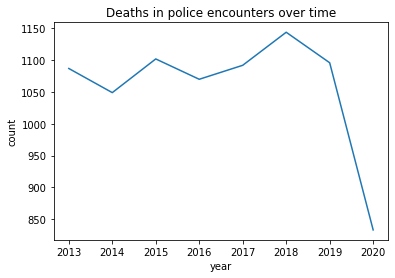

In [131]:
prop_charged_vs_time = sns.lineplot(
    data=deaths_table,
    x='year',
    y='count',
    ).set(title = "Deaths in police encounters over time")

The marked drop in 2020 can be explained by the fact that we have only used data from the first 9 months of 2020, due to our Tweet data ending in September 2020.

### Victim's Race

Initial summary statistics

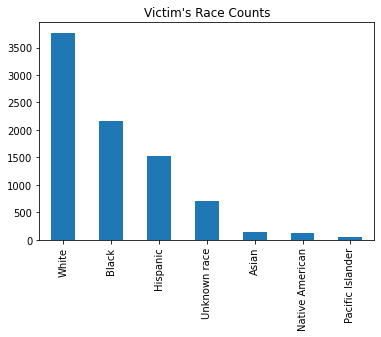

In [132]:
mpv['race'].value_counts().plot(kind='bar', title="Victim's Race Counts")

plt.show()

We observe that the majority of victims were White, followed by Black, with the Pacific Islander category exhibiting the fewest victim cases. More specifically, in terms of percentages:

In [133]:
mpv['race'].value_counts() / len(mpv['race'])

White               0.445179
Black               0.254219
Hispanic            0.180692
Unknown race        0.084150
Asian               0.015697
Native American     0.014163
Pacific Islander    0.005783
Name: race, dtype: float64

Next, we seek to view race in relation to cause of death. Did certain racial groups experience certain treatment?

In [134]:
race_cd = pd.pivot_table(data=(mpv.groupby(['cause_of_death','race']).count())[['date']],
                         index='cause_of_death',columns='race',aggfunc=np.sum)
race_cd

date                                   \
race                      Asian   Black Hispanic Native American   
cause_of_death                                                     
Asphyxiated                 NaN     1.0      1.0             NaN   
Bean bag                    NaN     NaN      NaN             NaN   
Beaten                      1.0     8.0      8.0             1.0   
Bomb                        NaN     1.0      NaN             NaN   
Chemical Agent              NaN     NaN      NaN             NaN   
Gunshot                   123.0  1947.0   1400.0           115.0   
Gunshot,Taser               4.0    68.0     51.0             2.0   
Gunshot,Vehicle             NaN     NaN      NaN             NaN   
Other                       NaN     2.0      3.0             NaN   
Pepper Spray                NaN     2.0      1.0             NaN   
Physical Restraint          3.0    16.0      8.0             NaN   
Taser                       2.0    94.0     51.0             2.0   
Taser,Physical Restraint    NaN     1.0      NaN             NaN   
Vehicle                     NaN    14.0      7.0             NaN   

                                                                
race                     Pacific Islander Unknown race   White  
cause_of_death                                                  
Asphyxiated                           NaN          1.0     6.0  
Bean bag                              NaN          1.0     1.0  
Beaten                                NaN          2.0    12.0  
Bomb                                  NaN          NaN     NaN  
Chemical Agent                        NaN          NaN     1.0  
Gunshot                              42.0        670.0  3518.0  
Gunshot,Taser                         5.0          8.0   109.0  
Gunshot,Vehicle                       NaN          NaN     1.0  
Other                                 NaN          NaN     NaN  
Pepper Spray                          NaN          NaN     2.0  
Physical Restraint                    1.0          1.0     5.0  
Taser                                 1.0         19.0   103.0  
Taser,Physical Restraint              NaN          NaN     1.0  
Vehicle                               NaN         11.0    12.0

In [135]:
race_cd.idxmax()

      race            
date  Asian               Gunshot
      Black               Gunshot
      Hispanic            Gunshot
      Native American     Gunshot
      Pacific Islander    Gunshot
      Unknown race        Gunshot
      White               Gunshot
dtype: object

Here we actually see that gunshot was the most common cause of death across all races.

Next, let's see how victim race relates to year of incident.

In [136]:
mpv['yr'] = pd.DatetimeIndex(mpv['date']).year
race_yr = pd.pivot_table(data=(mpv.groupby(['yr','race']).count())[['date']],
                         index='yr',columns='race',aggfunc=np.sum)
race_yr

date                                                                   
race Asian Black Hispanic Native American Pacific Islander Unknown race White
yr                                                                           
2013    19   291      169               5                2          171   430
2014    16   276      183              10                5           79   480
2015    29   305      195              13                4           13   543
2016    14   279      195              23                6           20   533
2017    12   278      226              28                6           33   509
2018    15   265      213              20               11          108   512
2019    17   282      206              13               10          119   449
2020    11   178      144               8                5          170   316

<AxesSubplot:title={'center':'Time Series of Victim Race from 2013 to 2020'}, xlabel='yr', ylabel='count'>

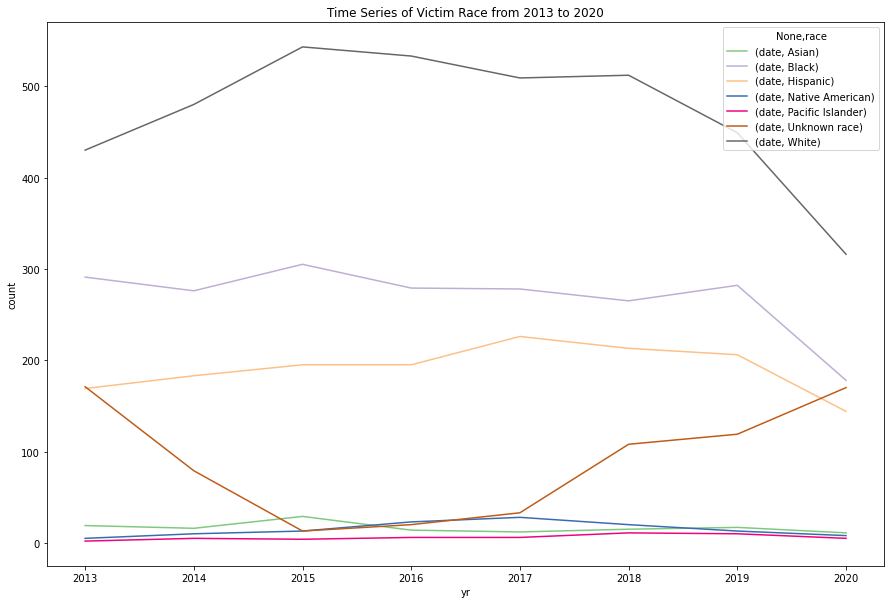

In [137]:
race_yr.plot(figsize=(15,10),title='Time Series of Victim Race from 2013 to 2020'
            ,ylabel='count',
            colormap='Accent')

From this time series, we can observe most notably that the number of white victims saw a drastic decline from 2018 to 2020, and the number of black victims steeply declined from 2019 to 2020. **However, we do see a steady increase in 'unknown race' during these periods of supposed decreases in police brutality, which could suggest that an increased lack of victim race reporting could be the cause of these decreases.**

Lastly, let's look at victim race in relation to whether they were allegedly armed.

In [138]:
race_arm = pd.pivot_table(data=(mpv.groupby(['armed','race']).count())[['date']],
                        index='armed',columns='race',aggfunc=np.sum)
race_arm

date                                 \
race                               Asian Black Hispanic Native American   
armed                                                                     
Allegedly Armed                      107  1447     1044              78   
Unarmed/Did Not Have Actual Weapon    13   372      223              13   
Unclear                                9   169      154              25   
Vehicle                                4   166      110               4   

                                                                        
race                               Pacific Islander Unknown race White  
armed                                                                   
Allegedly Armed                                  32          536  2743  
Unarmed/Did Not Have Actual Weapon                7           59   490  
Unclear                                           3           75   306  
Vehicle                                           7           43   233

In [139]:
race_arm.idxmax()

      race            
date  Asian               Allegedly Armed
      Black               Allegedly Armed
      Hispanic            Allegedly Armed
      Native American     Allegedly Armed
      Pacific Islander    Allegedly Armed
      Unknown race        Allegedly Armed
      White               Allegedly Armed
dtype: object

Allegedly armed was the most common case among all races.

### Officer Charged

We can start by looking at the data in the Officer Charged column to see some general statistics. Since the data is categorical, numerical analysis within this column is limited.

In [140]:
mpv['officer_charged'].value_counts()

Not Charged    8311
Charged         160
Unknown           2
Name: officer_charged, dtype: int64

As we can see, the officers were only charged in 160 cases, which is only 1.88% of all cases. Officers did not face any charges in 8311 cases, which represents 98.12% of cases.

We can look at the breakdown of when officers were charged grouped by the race of the victim:

In [141]:
# Temporarily adding a count column to help in making the pivot table. This will be dropped later.
mpv['count'] = 1
oc_by_race = mpv.groupby(['officer_charged', 'race']).count()
oc_by_race

cause_of_death  date  armed  count  year  \
officer_charged race                                                         
Charged         Asian                          2     2      2      2     2   
                Black                         73    73     73     73    73   
                Hispanic                      18    18     18     18    18   
                Native American                3     3      3      3     3   
                Pacific Islander               2     2      2      2     2   
                White                         62    62     62     62    62   
Not Charged     Asian                        131   131    131    131   131   
                Black                       2080  2080   2080   2080  2080   
                Hispanic                    1512  1513   1513   1513  1513   
                Native American              117   117    117    117   117   
                Pacific Islander              47    47     47     47    47   
                Unknown race                 713   713    713    713   713   
                White                       3709  3710   3710   3710  3710   
Unknown         Black                          1     1      1      1     1   

                                    yr  
officer_charged race                    
Charged         Asian                2  
                Black               73  
                Hispanic            18  
                Native American      3  
                Pacific Islander     2  
                White               62  
Not Charged     Asian              131  
                Black             2080  
                Hispanic          1513  
                Native American    117  
                Pacific Islander    47  
                Unknown race       713  
                White             3710  
Unknown         Black                1

In [142]:
obr_pvt_table = oc_by_race.pivot_table(index=['race'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
obr_pvt_table['Prop. Charged'] = 100 * obr_pvt_table['Charged'] / (obr_pvt_table['Charged'] + obr_pvt_table['Not Charged'] + obr_pvt_table['Unknown'])
obr_pvt_table

officer_charged,Charged,Not Charged,Unknown,Prop. Charged
race,,,,
Asian,2,131,0,1.503759
Black,73,2080,1,3.389044
Hispanic,18,1513,0,1.175702
Native American,3,117,0,2.500000
Pacific Islander,2,47,0,4.081633
Unknown race,0,713,0,0.000000
White,62,3710,0,1.643690


We can graph this data in a stacked bar chart:

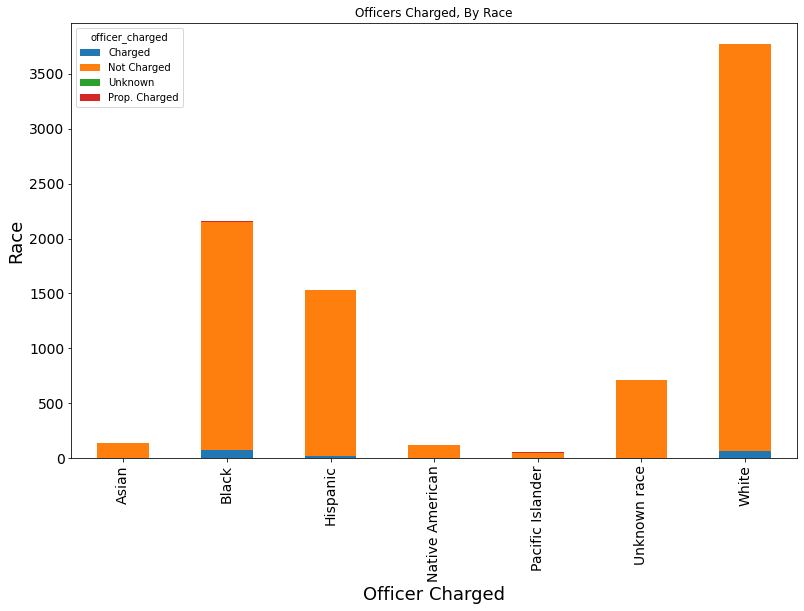

In [143]:
obr_pvt_table.plot.bar(figsize=(13,8), title="Officers Charged, By Race", stacked=True)

plt.ylabel('Race', fontsize=18)
plt.xlabel('Officer Charged', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
# Not very useful due to small quantities

In [144]:
# if 'count' in mpv.columns:
#     mpv.drop('count', axis=1, inplace=True)

We can also see how the proportion of of cases in which officers were charged has changed over time.

In [145]:
oc_by_time = mpv.groupby(['officer_charged', 'year']).count()
obt_pvt_table = oc_by_time.pivot_table(index=['year'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
obt_pvt_table['Prop. Charged'] = 100 * obt_pvt_table['Charged'] / (obt_pvt_table['Charged'] + obt_pvt_table['Not Charged'] + obt_pvt_table['Unknown'])
obt_pvt_table

officer_charged,Charged,Not Charged,Unknown,Prop. Charged
year,,,,
2013,19,1068,0,1.747930
2014,19,1029,1,1.811249
2015,25,1077,0,2.268603
2016,20,1050,0,1.869159
2017,19,1073,0,1.739927
2018,16,1128,0,1.398601
2019,26,1070,0,2.372263
2020,16,816,1,1.920768


Graphing this data to see any trends in the proportion of officers being charged over time:

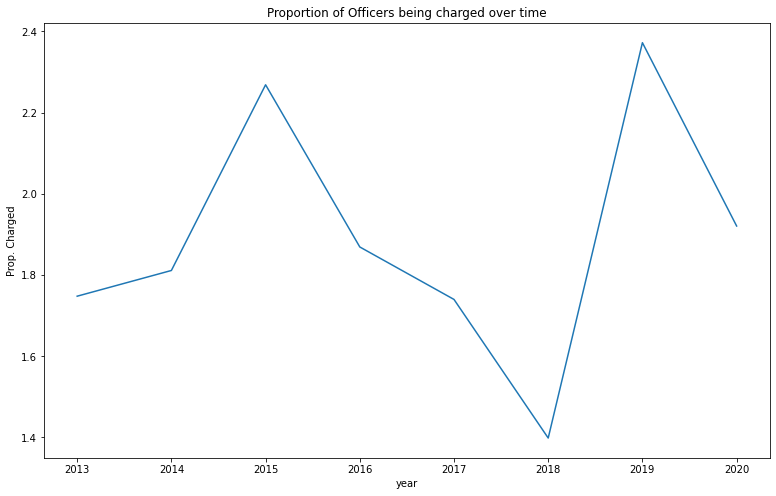

In [146]:
plt.figure(figsize=(13, 8))

prop_charged_vs_time = sns.lineplot(
    data=obt_pvt_table,
    x='year',
    y="Prop. Charged",
    ).set(title = "Proportion of Officers being charged over time")

We can also look at the race makeup of the victims in the cases where the officers were charged.

In [147]:
charged_by_race = oc_by_race.drop({'Not Charged', 'Unknown'})
cbr_pvt_table = charged_by_race.pivot_table(index=['race'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
cbr_pvt_table['Proportion'] = 100 * cbr_pvt_table['Charged'] / cbr_pvt_table['Charged'].sum()
cbr_pvt_table

officer_charged,Charged,Proportion
race,,
Asian,2,1.250
Black,73,45.625
Hispanic,18,11.250
Native American,3,1.875
Pacific Islander,2,1.250
White,62,38.750


Let's make a pie chart of this, and compare it to a pie chart of the proportion of races in the US.

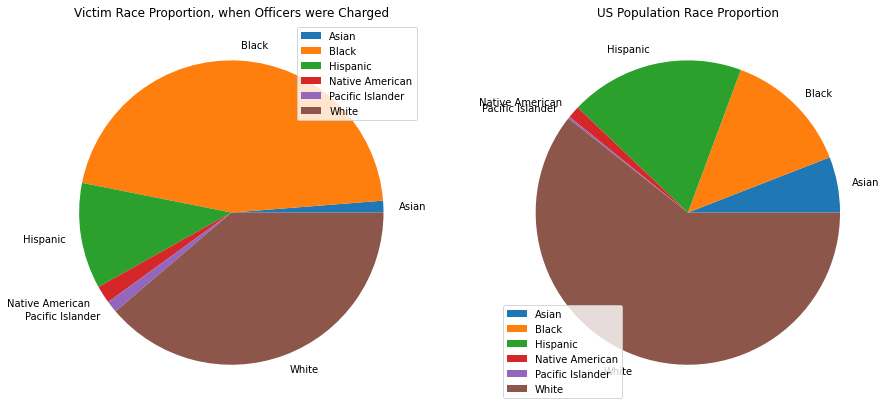

In [148]:
# Source: July 2021 Estimates by US Census Bureau, link: https://www.census.gov/quickfacts/fact/table/US/PST045221
cbr_pvt_table['USRace Prop.'] = (5.9, 13.4, 18.5, 1.3, 0.2, 60.5)
ax1, ax2 = cbr_pvt_table.drop('Charged', axis=1).plot.pie(figsize=(15,10), subplots=True, ylabel='')

ax1.title.set_text("Victim Race Proportion, when Officers were Charged")
ax2.title.set_text("US Population Race Proportion")

plt.show()

As we can see, the charts show there is a large disparity between the racial makeup of the US and the racial makeup of police killing victims. Specifically, people of color, especially black Americans, make up nearly half of all deaths despite making up under one-seventh of the US population. Despite white Americans making up over 60% of the population, they account for under 40% of the deaths in police encounters.

We can adjust the numbers to account for this by changing the data from raw values to deaths per 1,000,000 population in the US. This way, we will be able to see the proportion of the different races while accounting for their non-uniformity in the US population.

In [149]:
cbr_pvt_table['Population-adjusted Count (per 1,000,000 US Pop)'] = 1000000 * cbr_pvt_table['Charged'] / tuple([k*1000000 for k in (5.9, 13.4, 18.5, 1.3, 0.2, 60.5)])
cbr_pvt_table

officer_charged,Charged,Proportion,USRace Prop.,"Population-adjusted Count (per 1,000,000 US Pop)"
race,,,,
Asian,2,1.250,5.9,0.338983
Black,73,45.625,13.4,5.447761
Hispanic,18,11.250,18.5,0.972973
Native American,3,1.875,1.3,2.307692
Pacific Islander,2,1.250,0.2,10.000000
White,62,38.750,60.5,1.024793


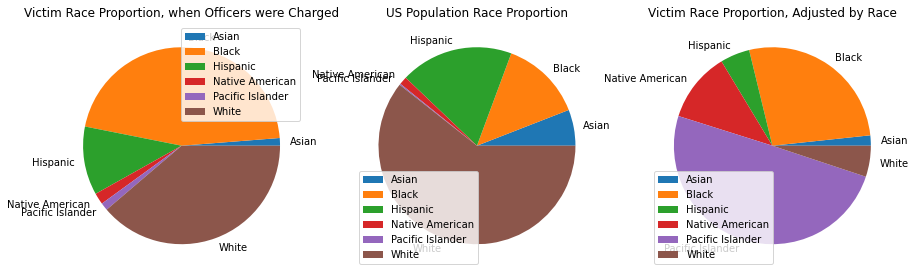

In [152]:
ax3, ax4, ax5 = cbr_pvt_table.drop('Charged', axis=1).plot.pie(figsize=(15,10), subplots=True, ylabel='')

ax3.title.set_text("Victim Race Proportion, when Officers were Charged")
ax4.title.set_text("US Population Race Proportion")
ax5.title.set_text("Victim Race Proportion, Adjusted by Race")

plt.show()

As we can see, the population-adjusted chart on the right shows the true proportion of the races of the victims, and they are far from uniform. Pacific Islanders, Black people and Native Americans are the most likely to be victims, while White and Asian Americans are the least likely.

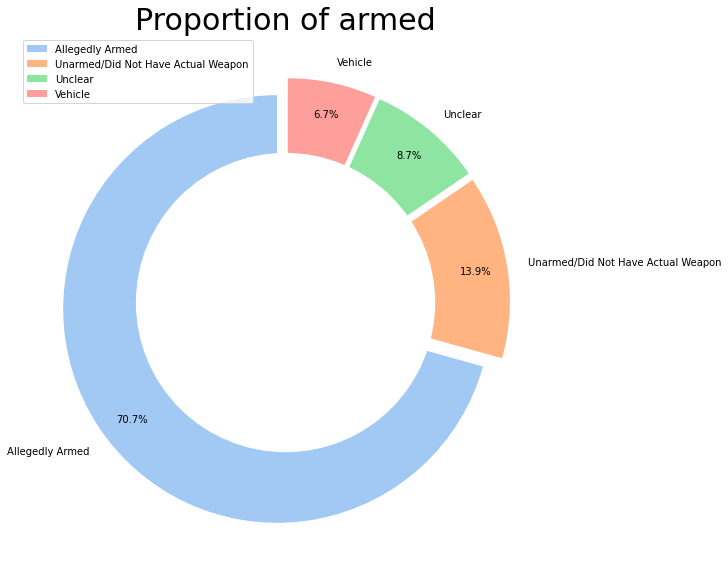

In [182]:
label = []
count = []
for i, j in mpv.groupby('armed'):
    label.append(i)
    count.append(j.shape[0])
fig = plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:13]
explode = (0.05, 0.05, 0.05, 0.05)
plt.pie(count, labels = label, colors=colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.legend()
plt.title("Proportion of armed",fontsize=30)
plt.show()

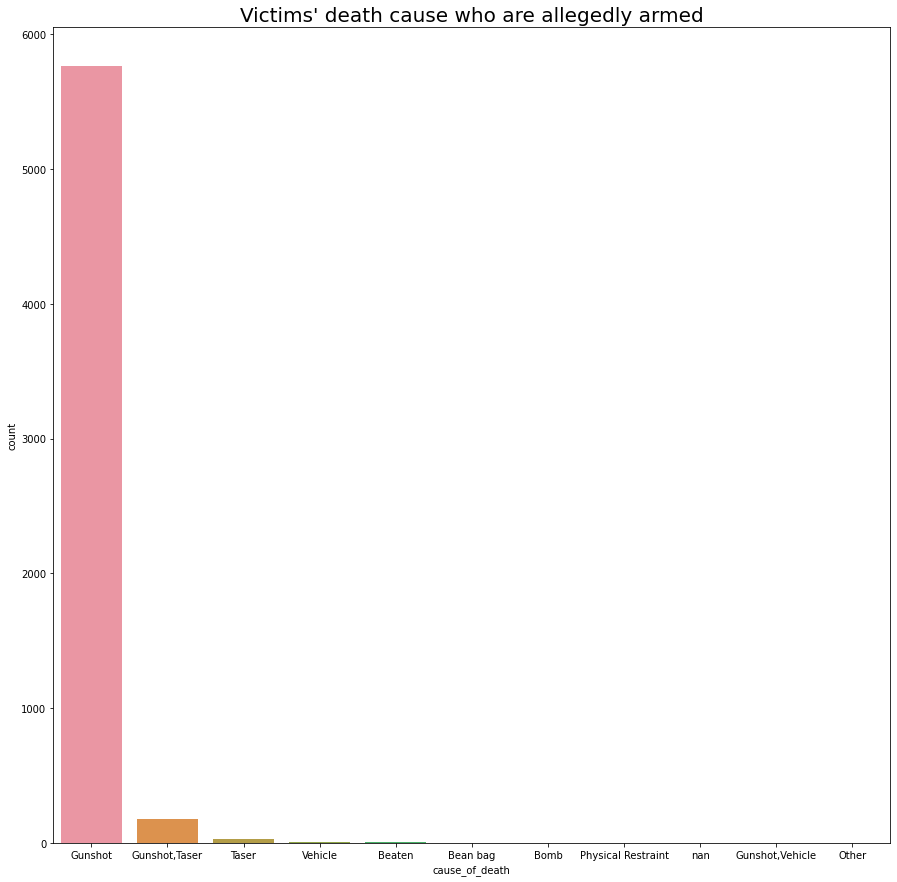

In [183]:
armed = mpv[mpv['armed'] == 'Allegedly Armed']
fig = plt.figure(figsize=(15, 15))
sns.countplot(x="cause_of_death", data=armed, order = armed['cause_of_death'].unique())
plt.title("Victims' death cause who are allegedly armed",fontsize=20)
plt.show()

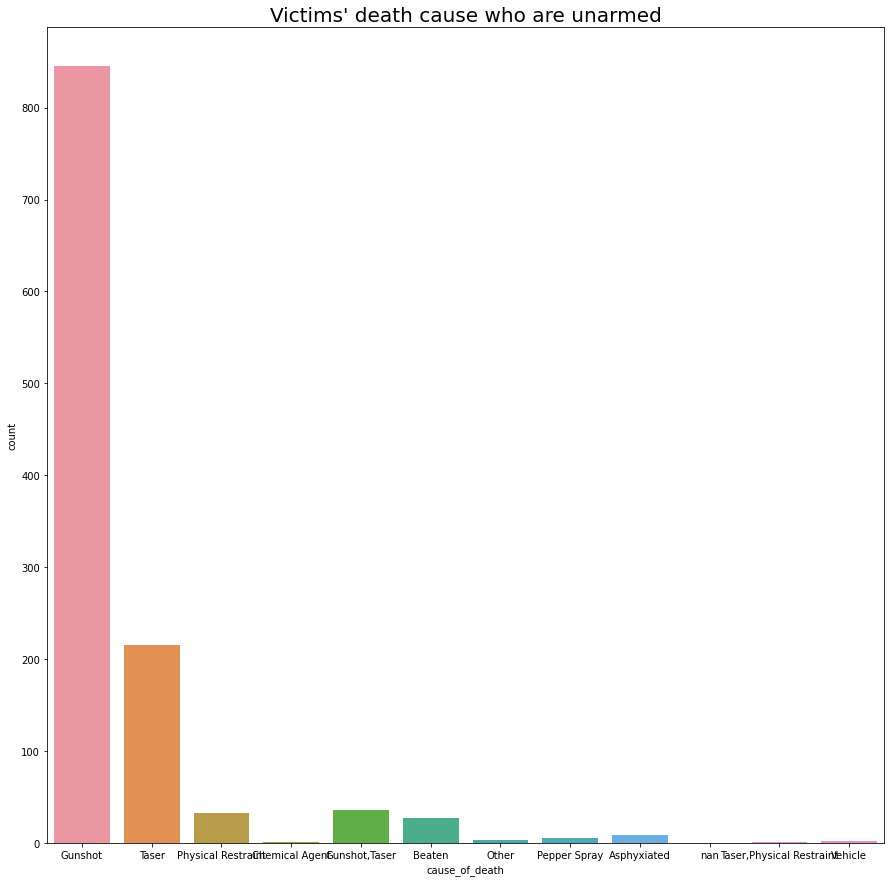

In [184]:
armed = mpv[mpv['armed'] == 'Unarmed/Did Not Have Actual Weapon']
fig = plt.figure(figsize=(15, 15))
sns.countplot(x="cause_of_death", data=armed, order = armed['cause_of_death'].unique())
plt.title("Victims' death cause who are unarmed",fontsize=20)
plt.show()

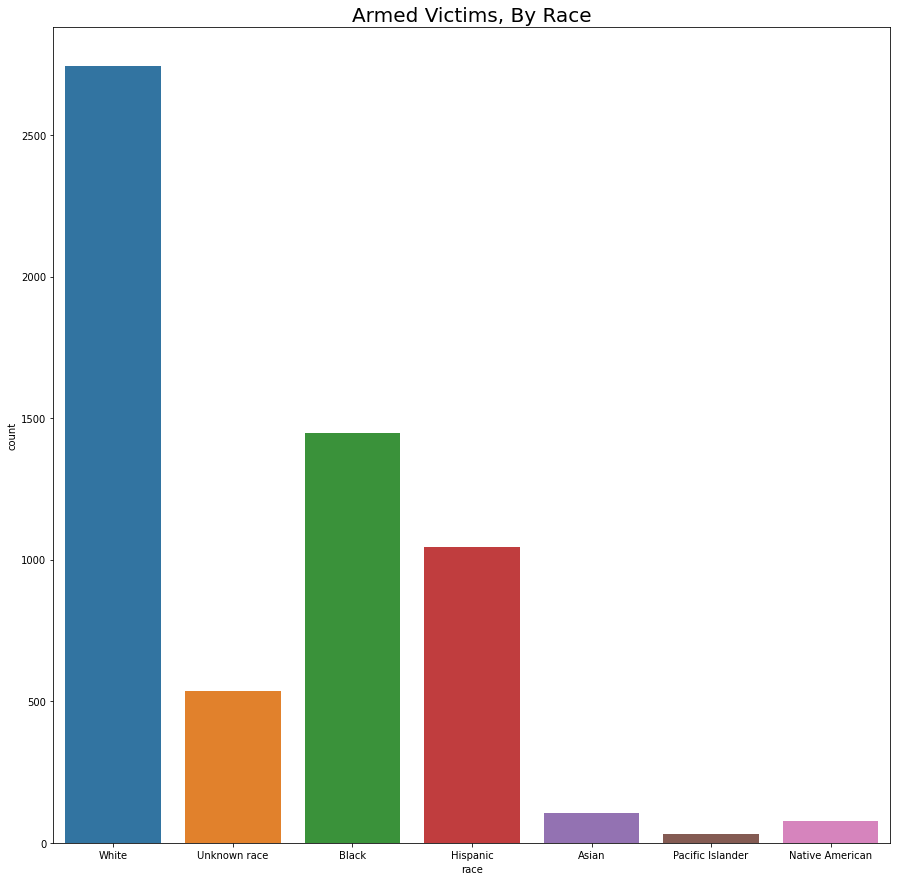

In [185]:
armed = mpv[mpv['armed'] == 'Allegedly Armed']
fig = plt.figure(figsize=(15, 15))
sns.countplot(x="race", data=armed, order = armed['race'].unique())
plt.title("Armed Victims, By Race",fontsize=20)
plt.show()

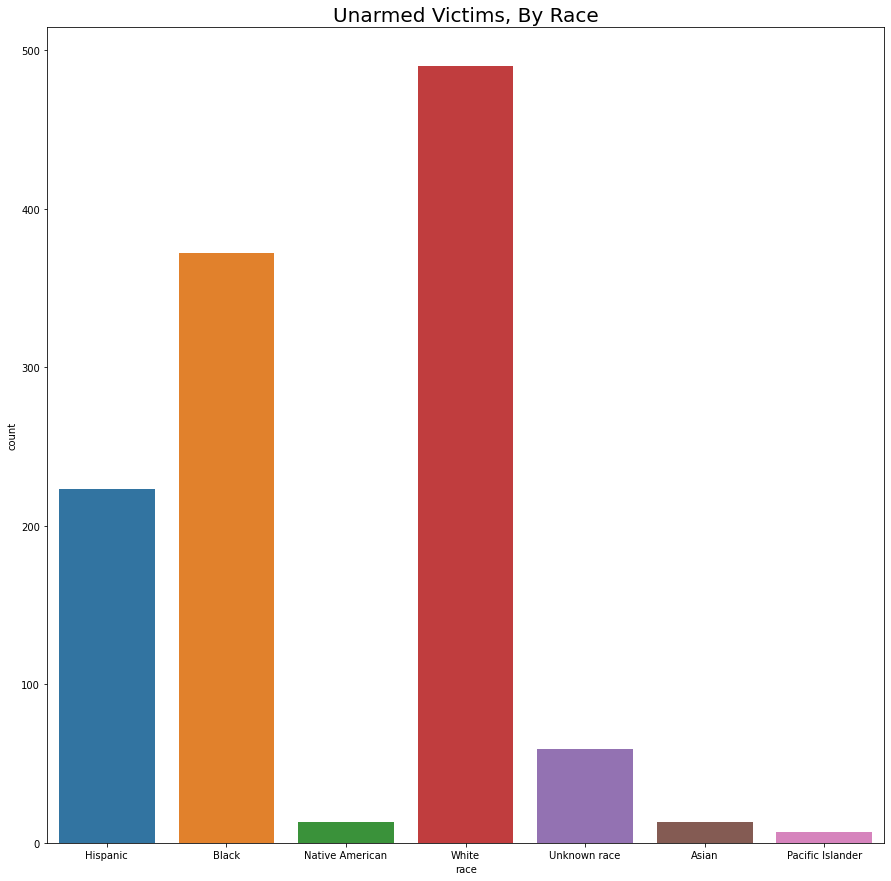

In [186]:
armed = mpv[mpv['armed'] == 'Unarmed/Did Not Have Actual Weapon']
fig = plt.figure(figsize=(15, 15))
sns.countplot(x="race", data=armed, order = armed['race'].unique())
plt.title("Unarmed Victims, By Race",fontsize=20)
plt.show()

In [36]:
mpv

,cause_of_death,race,date,officer_charged,armed,yr,count,year
1602,Gunshot,White,2020-09-30,Not Charged,Allegedly Armed,2020,1,2020
1603,Gunshot,Black,2020-09-30,Not Charged,Unclear,2020,1,2020
1604,Gunshot,Unknown race,2020-09-29,Not Charged,Allegedly Armed,2020,1,2020
1605,Gunshot,Black,2020-09-28,Not Charged,Allegedly Armed,2020,1,2020
1606,Gunshot,Hispanic,2020-09-28,Not Charged,Allegedly Armed,2020,1,2020
...,...,...,...,...,...,...,...,...
10070,Gunshot,Hispanic,2013-01-01,Not Charged,Unclear,2013,1,2013
10071,Gunshot,Black,2013-01-01,Not Charged,Allegedly Armed,2013,1,2013
10072,Gunshot,White,2013-01-01,Not Charged,Allegedly Armed,2013,1,2013
10073,Gunshot,Hispanic,2013-01-01,Not Charged,Allegedly Armed,2013,1,2013


## Twitter Data

We need to combine the multiple csv folders of tweet ids into one big one to then randomlly select tweets to hydrate.

In [37]:
def flatten(directory):
    for dirpath, _, filenames in os.walk(directory, topdown=False):
        for filename in filenames:
            i = 0
            source = os.path.join(dirpath, filename)
            target = os.path.join(directory, filename)

            while os.path.exists(target):
                i += 1
                file_parts = os.path.splitext(os.path.basename(filename))

                target = os.path.join(
                    directory,
                    file_parts[0] + "_" + str(i) + file_parts[1],
                )

            shutil.move(source, target)

            print("Moved ", source, " to ", target)

        if dirpath != directory:
            os.rmdir(dirpath)

            print("Deleted ", dirpath)

#credit to: https://amitd.co/code/python/flatten-a-directory

In [38]:
flatten(os.path.dirname("/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/twitter"))

Flattened all folders to make combining into one CSV easier.

In [39]:
tweets_path = "/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/"
file_list = [tweets_path + f for f in os.listdir(tweets_path)]
csv_list = []

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/'

In [ ]:
for file in sorted(file_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

csv_merged = pd.concat(csv_list, ignore_index=True)
csv_merged.to_csv(tweets_path + 'tweets_full.csv', index=False)

Tweet IDs successfully merged into one big CSV ready to be permutated.

In [ ]:
tweets = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_full.csv')
tweets.head()

In [ ]:
tweets_sample = tweets.sample(n = 2000000)
tweets_sample.head()

Randomly selected 2,000,000 tweet IDs. Now, we need to export back to CSV file with just the IDs to hydrate the tweets.

In [ ]:
tweets_sample_id = tweets_sample['status_id']

In [ ]:
tweets_sample_id.to_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_sample_id2.csv', header=False, index=False)

In [5]:
tweets_ids_full = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_full.csv')
tweets_ids_full.head()

,status_id,blacklivesmatter,alllivesmatter,bluelivesmatter,File_Name
0,296004745028567040,1.0,0.0,0.0,2013-01.csv
1,299022201141735424,0.0,1.0,0.0,2013-02.csv
2,316973754951540737,1.0,0.0,0.0,2013-03.csv
3,315462982803009536,1.0,0.0,0.0,2013-03.csv
4,316242983945129984,1.0,0.0,0.0,2013-03.csv


In [6]:
tweets_ids = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_sample_id2.csv')

In [7]:
tweets_ids.rename(columns={'1290186396066385920': 'status_id'}, inplace=True)
tweets_ids.head()

,status_id
0,1442502045873836049
1,1272234644100878336
2,1296287221528637440
3,1227080713142448128
4,1278442441264320513


In [8]:
tweets_ids = tweets_ids.append({'status_id': 1290186396066385920}, ignore_index=True)

C:\Users\dmusa\AppData\Local\Temp\ipykernel_13780\2666460491.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_ids = tweets_ids.append({'status_id': 1290186396066385920}, ignore_index=True)


In [33]:
tweets_ids.shape

(2250000, 1)

Tweet IDs from our sample. Merge onto dataframe with labels.

In [9]:
merged_ids= pd.merge(tweets_ids, tweets_ids_full, on="status_id", how="inner")
merged_ids.shape

(4500000, 5)

In [10]:
merged_ids

,status_id,blacklivesmatter,alllivesmatter,bluelivesmatter,File_Name
0,1442502045873836049,1.0,0.0,0.0,2021-09.csv
1,1442502045873836049,1.0,0.0,0.0,2021-09.csv
2,1442502045873836049,1.0,0.0,0.0,2021-09.csv
3,1442502045873836049,1.0,0.0,0.0,2021-09.csv
4,1272234644100878336,1.0,0.0,0.0,2020-06.csv
...,...,...,...,...,...
4499995,1274924331496333312,1.0,0.0,0.0,2020-06.csv
4499996,1272243653092704256,1.0,0.0,0.0,2020-06.csv
4499997,1272243653092704256,1.0,0.0,0.0,2020-06.csv
4499998,1290186396066385920,1.0,0.0,0.0,2020-08.csv


Thank you to Stanley Sisson for creating the next cell!

In [18]:
# Pandas, for the dataframe
import pandas as pd
# JSON, for reading json objects
import json
# Time for measuring how long it will take
import time
import numpy as np
def currentTime():
    return round(time.time() * 1000)
# Date format changer
import dateutil.parser as parser
def convertDate(t):
    return parser.parse(t).isoformat()
    
# Counting variables
ct = 0          # Number of items done
total = 1928721 # Total items to do

# Timing variables
start = currentTime()
last = start
now = start

# Open the json file in READ mode...
with open('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_sample_id2_hydrated.json','r', encoding="utf8") as f:
    # Open the csv file in WRITE mode...
    with open('tweets.csv','w', encoding="utf8") as f2:
        # Write the CSV header (column names seperated with a comma)
        f2.write('id,time\n')
        
        # For each line in the input file
        for line in f:
            # Read each line as json,
            obj = json.loads(line)
            # Get its ID as a string
            # Get its TIME and parse it to ISO format
            # Write it to output file in CSV format:
            #   - put a comma between values
            #   - end with a newline
            f2.write(str(obj["id"])+","+convertDate(obj["created_at"])+"\n")
            
            # Progress updates
            ct=ct+1
            now = currentTime()
            # If ten seconds have passed, display progress update
            if (last+10000<now):
                dt = (now-start)/1000. # delta time, aka time passed since start
                v = ct/dt              # velocity, aka how fast things are done
                rems = (total-ct)/v    # remaining seconds (total time in seconds)
                remm = round(np.floor(rems/60)) # remaining minutes (from mm:ss)
                rems = round(np.floor(rems%60)) # remaining seconds (from mm:ss)
                # Display
                print(str(ct) + " items loaded in "+str(round(dt))+"s ("+str(round(10000*ct/total)/100)+"% done)")
                print("  "+str(round(v)) + " items per second: "+str(remm)+" min "+str(rems)+" sec left")
                # Update last output time
                last = now

37618 items loaded in 10s (1.95% done)
  3761 items per second: 8 min 22 sec left
76189 items loaded in 20s (3.95% done)
  3809 items per second: 8 min 6 sec left
106715 items loaded in 30s (5.53% done)
  3557 items per second: 8 min 32 sec left
138522 items loaded in 40s (7.18% done)
  3463 items per second: 8 min 36 sec left
168602 items loaded in 50s (8.74% done)
  3372 items per second: 8 min 42 sec left
201590 items loaded in 60s (10.45% done)
  3359 items per second: 8 min 34 sec left
234049 items loaded in 70s (12.13% done)
  3343 items per second: 8 min 26 sec left
266786 items loaded in 80s (13.83% done)
  3334 items per second: 8 min 18 sec left
300277 items loaded in 90s (15.57% done)
  3336 items per second: 8 min 8 sec left
332339 items loaded in 100s (17.23% done)
  3323 items per second: 8 min 0 sec left
365766 items loaded in 110s (18.96% done)
  3325 items per second: 7 min 50 sec left
396504 items loaded in 120s (20.56% done)
  3304 items per second: 7 min 43 sec left

Tweets with time and id.

In [19]:
tweets_id_dates = pd.read_csv("tweets.csv")
tweets_id_dates.head()

,id,time
0,1298955271587405800,2020-08-27T12:07:24+00:00
1,1279794731866894300,2020-07-05T15:10:16+00:00
2,1272116933740114000,2020-06-14T10:41:26+00:00
3,1269704052532789200,2020-06-07T18:53:30+00:00
4,1350089310587003000,2021-01-15T14:35:49+00:00


In [20]:
tweets_id_dates.shape

(783236, 2)

Rename so we can merge onto the dataframe with labels.

In [21]:
tweets_id_dates.rename(columns={"id": "status_id"}, inplace=True)
tweets_id_dates.head()

,status_id,time
0,1298955271587405800,2020-08-27T12:07:24+00:00
1,1279794731866894300,2020-07-05T15:10:16+00:00
2,1272116933740114000,2020-06-14T10:41:26+00:00
3,1269704052532789200,2020-06-07T18:53:30+00:00
4,1350089310587003000,2021-01-15T14:35:49+00:00


Merge so we have IDs, time, and labels.

In [22]:
final_merge = pd.merge(tweets_id_dates, tweets_ids_full, on="status_id", how="inner")
final_merge.shape

(32524, 6)

In [23]:
final_merge.head()

,status_id,time,blacklivesmatter,alllivesmatter,bluelivesmatter,File_Name
0,537684004657725440,2014-11-26T19:07:11+00:00,1.0,0.0,0.0,2014-11.csv
1,537684004657725440,2014-11-26T19:07:11+00:00,1.0,0.0,0.0,2014-11.csv
2,1269868146640384000,2020-06-08T05:45:33+00:00,1.0,0.0,0.0,2020-06.csv
3,1269868146640384000,2020-06-08T05:45:33+00:00,1.0,0.0,0.0,2020-06.csv
4,930503267662131200,2017-11-14T18:30:41+00:00,1.0,0.0,0.0,2017-11.csv


Change date into datetime format and remove time.

In [24]:
final_merge["time"] = pd.to_datetime(final_merge['time'])
final_merge["time"] = final_merge["time"].dt.date
final_merge['time']= pd.to_datetime(final_merge['time'])
final_merge['time']

0       2014-11-26
1       2014-11-26
2       2020-06-08
3       2020-06-08
4       2017-11-14
           ...    
32519   2020-08-20
32520   2014-12-14
32521   2014-12-14
32522   2020-07-01
32523   2020-07-01
Name: time, Length: 32524, dtype: datetime64[ns]

Rename columns to shorten.

In [25]:
final_merge.rename(columns={"blacklivesmatter": "blm","alllivesmatter":"alm","bluelivesmatter":"blulm"}, inplace=True)
final_merge.head()

,status_id,time,blm,alm,blulm,File_Name
0,537684004657725440,2014-11-26,1.0,0.0,0.0,2014-11.csv
1,537684004657725440,2014-11-26,1.0,0.0,0.0,2014-11.csv
2,1269868146640384000,2020-06-08,1.0,0.0,0.0,2020-06.csv
3,1269868146640384000,2020-06-08,1.0,0.0,0.0,2020-06.csv
4,930503267662131200,2017-11-14,1.0,0.0,0.0,2017-11.csv


Change labels from one-hot encoded to category labels. First, create new dataframe with just labels.

In [38]:
labels= final_merge[['blm','alm', 'blulm']]
labels.head()

,blm,alm,blulm
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


Replace 1's with respect label in each column and replace 0's with NaN.

In [39]:
labels['blm'].replace({1:"blm", 0: float("nan")}, inplace=True)
labels['blm']

C:\Users\dmusa\AppData\Local\Temp\ipykernel_13780\1126092795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['blm'].replace({1:"blm", 0: float("nan")}, inplace=True)


0        blm
1        blm
2        blm
3        blm
4        blm
        ... 
32519    blm
32520    NaN
32521    NaN
32522    blm
32523    blm
Name: blm, Length: 32524, dtype: object

In [40]:
labels['alm'].replace({1:"alm", 0: float("nan")}, inplace=True)
labels['alm']

C:\Users\dmusa\AppData\Local\Temp\ipykernel_13780\3944052779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['alm'].replace({1:"alm", 0: float("nan")}, inplace=True)


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32519    NaN
32520    alm
32521    alm
32522    NaN
32523    NaN
Name: alm, Length: 32524, dtype: object

In [41]:
labels['blulm'].replace({1:"blulm", 0: float("nan")}, inplace=True)
labels['blulm']

C:\Users\dmusa\AppData\Local\Temp\ipykernel_13780\2821707966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['blulm'].replace({1:"blulm", 0: float("nan")}, inplace=True)


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32519    NaN
32520    NaN
32521    NaN
32522    NaN
32523    NaN
Name: blulm, Length: 32524, dtype: object

Flatten three columns into one with labels.

In [42]:
labels['alm'].loc[labels['blm'].loc[~labels['blm'].isnull()].index] = 'blm'
labels['alm'].loc[labels['blulm'].loc[~labels['blulm'].isnull()].index] = 'blulm'
print(labels['alm'])

0        blm
1        blm
2        blm
3        blm
4        blm
        ... 
32519    blm
32520    alm
32521    alm
32522    blm
32523    blm
Name: alm, Length: 32524, dtype: object


C:\Users\dmusa\AppData\Local\Temp\ipykernel_13780\4290031881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['alm'].loc[labels['blm'].loc[~labels['blm'].isnull()].index] = 'blm'
C:\Users\dmusa\AppData\Local\Temp\ipykernel_13780\4290031881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['alm'].loc[labels['blulm'].loc[~labels['blulm'].isnull()].index] = 'blulm'


Rename column.

In [43]:
labels.rename(columns={'alm':'label'}, inplace=True)

C:\Users\dmusa\AppData\Local\Temp\ipykernel_13780\3474713512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels.rename(columns={'alm':'label'}, inplace=True)


In [47]:
labels = labels.drop(columns=['blm', 'blulm'])

In [48]:
labels.head()

,label
0,blm
1,blm
2,blm
3,blm
4,blm


Merge label to final tweet dataframe.

In [51]:
final_merge = final_merge.join(labels)

In [120]:
final_merge.shape

(32524, 8)

In [52]:
final_merge.head()

,status_id,time,blm,alm,blulm,File_Name,label
0,537684004657725440,2014-11-26,1.0,0.0,0.0,2014-11.csv,blm
1,537684004657725440,2014-11-26,1.0,0.0,0.0,2014-11.csv,blm
2,1269868146640384000,2020-06-08,1.0,0.0,0.0,2020-06.csv,blm
3,1269868146640384000,2020-06-08,1.0,0.0,0.0,2020-06.csv,blm
4,930503267662131200,2017-11-14,1.0,0.0,0.0,2017-11.csv,blm


In [55]:
tweets_ids_full.head()

,status_id,blacklivesmatter,alllivesmatter,bluelivesmatter,File_Name
0,296004745028567040,1.0,0.0,0.0,2013-01.csv
1,299022201141735424,0.0,1.0,0.0,2013-02.csv
2,316973754951540737,1.0,0.0,0.0,2013-03.csv
3,315462982803009536,1.0,0.0,0.0,2013-03.csv
4,316242983945129984,1.0,0.0,0.0,2013-03.csv


In [56]:
tweets_ids_full['blacklivesmatter'].replace({1:"blm", 0: float("nan")}, inplace=True)
tweets_ids_full['alllivesmatter'].replace({1:"alm", 0: float("nan")}, inplace=True)
tweets_ids_full['bluelivesmatter'].replace({1:"blulm", 0: float("nan")}, inplace=True)

In [59]:
tweets_ids_full['alllivesmatter'].loc[tweets_ids_full['blacklivesmatter'].loc[~tweets_ids_full['blacklivesmatter'].isnull()].index] = 'blm'
tweets_ids_full['alllivesmatter'].loc[tweets_ids_full['bluelivesmatter'].loc[~tweets_ids_full['bluelivesmatter'].isnull()].index] = 'blulm'

In [61]:
tweets_ids_full.rename(columns={'alllivesmatter':'label'}, inplace=True)

In [63]:
tweets_ids_full.shape

(127769598, 5)

## Tweets EDA

<AxesSubplot:title={'center':'Tweet Label Count of Original Dataset'}>

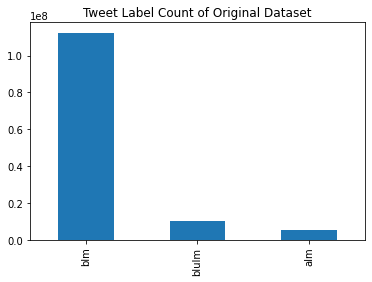

In [119]:
tweets_ids_full['label'].value_counts().plot(kind='bar', title="Tweet Label Count of Original Dataset")

<AxesSubplot:title={'center':'Tweet Label Count of Sample'}>

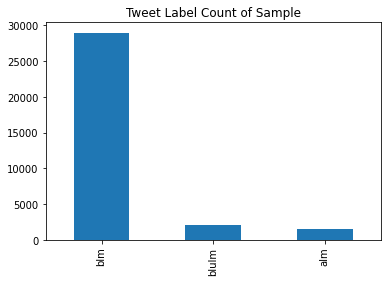

In [118]:
final_merge['label'].value_counts().plot(kind='bar', title="Tweet Label Count of Sample")

In [72]:
tweets_by_year = pd.DataFrame(final_merge['time'].dt.year.value_counts().reset_index().values, columns=["year","tweet_count"])
tweets_by_year

,year,tweet_count
0,2020,21040
1,2015,2302
2,2021,2172
3,2016,1974
4,2017,1718
5,2014,1402
6,2018,970
7,2019,946


### Tweets Over Time

[Text(0.5, 1.0, 'Total Tweets Over Time')]

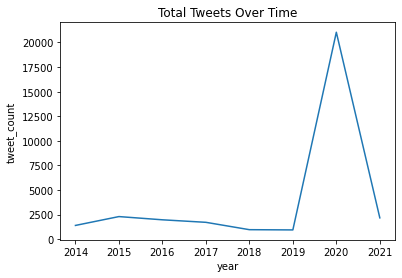

In [108]:
sns.lineplot(
    data=tweets_by_year,
    x='year',
    y='tweet_count',
    ).set(title = "Total Tweets Over Time")

Let's break it down by label.

In [104]:
final_merge['year'] = pd.DatetimeIndex(final_merge['time']).year
label_year = pd.pivot_table(data=(final_merge.groupby(['year','label']).count())[['time']],
                         index='year',columns='label',aggfunc=np.sum)
label_year

time             
label  alm    blm blulm
year                   
2014   104   1258    40
2015   352   1894    56
2016   334   1272   368
2017   108   1262   348
2018    44    722   204
2019    52    648   246
2020   412  19972   656
2021    54   1928   190

<AxesSubplot:title={'center':'Total Tweets Over Time, by Label'}, xlabel='year', ylabel='year'>

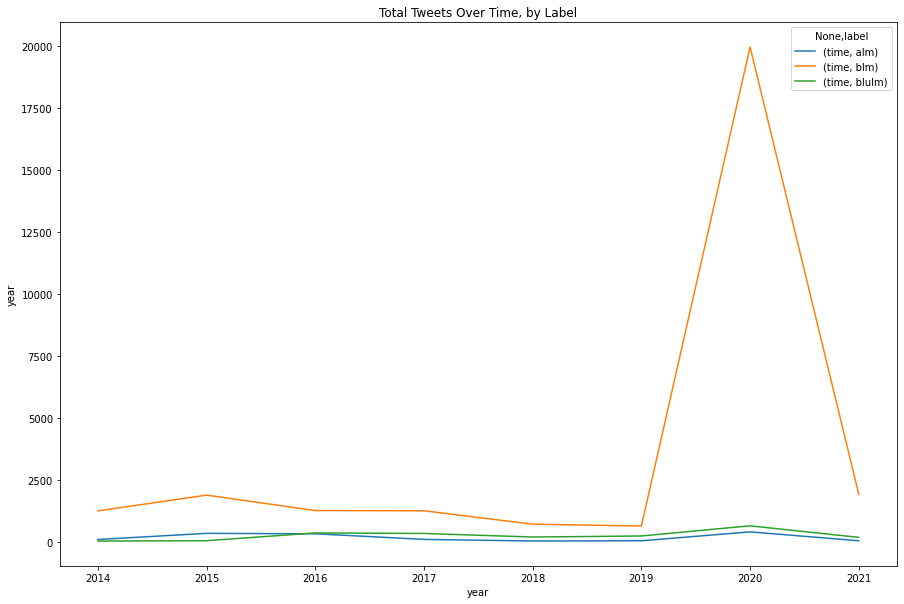

In [109]:
label_year.plot(figsize=(15,10), title='Total Tweets Over Time, by Label', ylabel='year')

Lets look at how the counts of tweets compares with the counts of death caused by police.

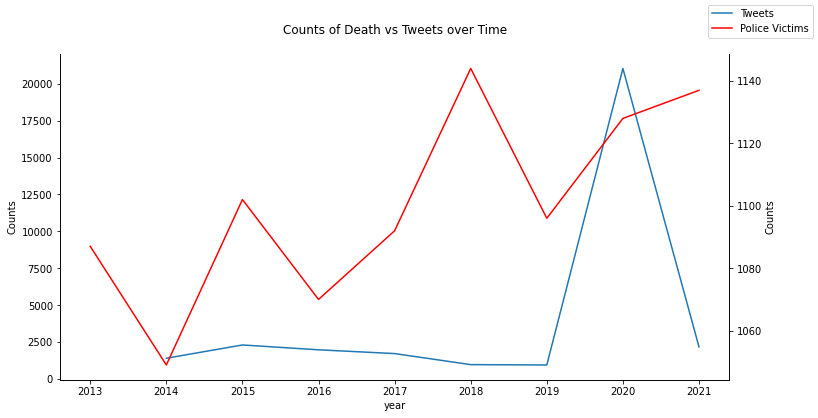

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
#tweets line chart
lineplot = sns.lineplot(x='year', y='tweet_count', data=tweets_by_year, label= 'Tweets', legend=False)
sns.despine()
plt.ylabel('Counts')
plt.title('Counts of Death vs Tweets over Time', pad=20);
#police line chart
ax2 = ax.twinx()
lineplot2 = sns.lineplot(x='year', y='count', data=deaths_table[deaths_table.year <= 2021], ax=ax2, color='r', label='Police Victims', legend=False)
sns.despine(right=False)
plt.ylabel('Counts')
ax.figure.legend();

Now that we have the tweets, let's go over the variables in the dataframe. 

The creators of the dataset categorized each tweet as supporting one of three major movements: Black Lives Matter, All Lives Matter, and Blue Lives Matter. The tweets are one hot encoded. 

The used an assortment of keywords and hashtags, as shown below, to categorize the tweets. These terms have a weight. The weight indicates how unique a term is to the topic. So a "1.0" tells us this term showed up only in that topic.

In [117]:
alm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/alm50.csv')
alm = alm[['term', 'weight']]
alm.sort_values(by=['weight'],ascending=False)
alm.loc[alm['weight'] == 1.0]

,term,weight
8,#bible,1.0
32,#ilovejesus,1.0
38,#lfj,1.0
57,#prayergift,1.0
70,#taniaspeaks,1.0
71,#teamgod,1.0
112,christ,1.0
281,#clearenough4u,1.0
291,#gavinnewsom,1.0
297,#lennar,1.0


In [112]:
blm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/blm100.csv')
blm = blm[['term', 'weight']]
blm.head()
#pd.set_option('display.max_rows', None)
blm.loc[blm['weight'] == 1.0]

,term,weight
33,application,1.0
3072,luther,1.0
4579,#russelllee,1.0
9064,archive,1.0
9306,barack,1.0
11896,#callbankamerica,1.0
12012,#saveouryouth,1.0
12054,800.732.9194,1.0
14139,constituents,1.0
14699,#iuic,1.0


In [114]:
blulm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/blulm25.csv')
blulm = blulm[['term', 'weight']]
blulm.head()
#pd.set_option('display.max_rows', None)
blulm.loc[blulm['weight'] == 1.0]

,term,weight
0,#axlesgarage,1.0
8,#ghetto,1.0
10,#igotyour6,1.0
13,#jeepwrangler,1.0
14,#lawenforcementofficers,1.0
17,#peacemakers,1.0
22,#respecttheshield,1.0
25,#teachyourkids,1.0
34,axle,1.0
37,ballard's,1.0
